In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from tensorflow.keras.datasets import mnist

In [35]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

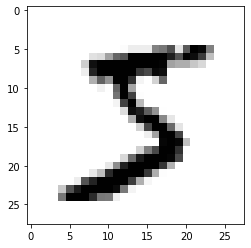

In [36]:
plt.imshow(X_train[0],cmap='binary')

In [37]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
only_zeroes = X_train[y_train==0]

In [39]:
only_zeroes.shape

(5923, 28, 28)

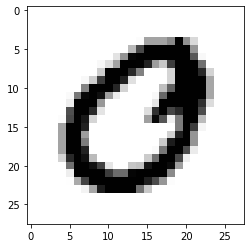

In [40]:
plt.imshow(only_zeroes[2234],cmap='binary')

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,Flatten

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
# FINAL OUTPUT LAYER
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [44]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='sigmoid'))
generator.add(Reshape([28,28]))

In [45]:
GAN = Sequential([generator,discriminator])

In [46]:
discriminator.trainable = False

In [47]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [48]:
batch_size = 32

In [49]:
my_data = only_zeroes

In [50]:
5923/32

185.09375

In [51]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [65]:
dataset

<PrefetchDataset shapes: (32, 28, 28), types: tf.uint8>

In [52]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [53]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [74]:
for i in dataset.take(1):
    print (i[0][10])

tf.Tensor(
[  0   0   0   0   0   0   0  13 209 253 247 213  90   0   0   0   0   0
   0   0 174 253 242  19   0   0   0   0], shape=(28,), dtype=uint8)


In [54]:
epochs = 5

In [55]:
GAN.layers[0].summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_11 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [56]:
GAN.layers[1].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 265,902
Trainable params: 132,951
Non-trainable params: 132,951
_________________________________________________________________


In [57]:
[[0.0]]*batch_size + [[1.0]]*batch_size

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0]]

In [58]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f'Currently on Epoch {epoch+1}')
    i=0
    
    for X_batch in dataset:
        
        i = i + 1
        
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
            
            # DISCRIMINATOR TRAINING PHASE
            
            noise = tf.random.normal(shape=[batch_size,codings_size])
            
            gen_images = generator(noise)
            
            X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
            
            y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
            
            
            discriminator.trainable = True
            
            discriminator.train_on_batch(X_fake_vs_real,y1)
            
            
            # TRAIN GENERATOR
            noise = tf.random.normal(shape=[batch_size,codings_size])
            
            y2 = tf.constant([[1.0]]*batch_size)
            
            discriminator.trainable = False
            
            GAN.train_on_batch(noise,y2)
            

Currently on Epoch 1
	Currently on batch number 100 of 185
Currently on Epoch 2
	Currently on batch number 100 of 185
Currently on Epoch 3
	Currently on batch number 100 of 185
Currently on Epoch 4
	Currently on batch number 100 of 185
Currently on Epoch 5
	Currently on batch number 100 of 185


In [59]:
noise = tf.random.normal(shape=[10,codings_size])

In [60]:
noise.shape

TensorShape([10, 100])

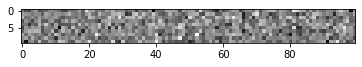

In [61]:
plt.imshow(noise,cmap='binary')

In [62]:
images = generator(noise)

In [63]:
images.shape

TensorShape([10, 28, 28])

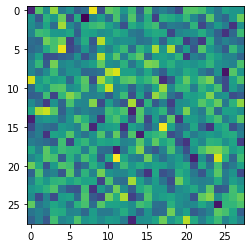

In [64]:
plt.imshow(images[5])